In [19]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy.stats import norm
import scipy.stats as stats
from scipy.optimize import curve_fit
import scipy.integrate as integrate

%matplotlib notebook


# Part 1


In [65]:

currents = np.array([0.0,0.2,0.4,0.6,0.8,1.0,1.2,1.4,1.6,1.8,2.0,2.2]) #(A)
freqs = np.array([0.13,0.66,1.24,1.84,2.41,3.12,3.76,4.15,4.66,5.30,6.28,6.75]) #(MHz)

mcurrent = np.mean(currents)
mfreq = np.mean(freqs)

# from the Gauss's formula, we can compute the slope m and the intercept

top = 0
bot = 0
for i in range(len(currents)):
    top += (currents[i] - mcurrent)*(freqs[i] - mfreq)
    bot += (currents[i] - mcurrent)**2

slope = top/bot
intercept = mfreq - slope*mcurrent
print('Slope:', slope)
print('Intercept:', intercept)

Slope: 3.003146853146853
Intercept: 0.054871794871796276


<IPython.core.display.Javascript object>


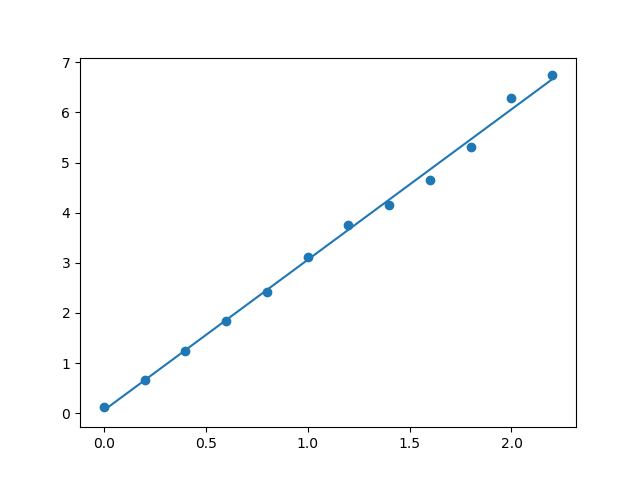

In [66]:
plt.figure()
plt.scatter(currents,freqs)
line = currents*slope + intercept
plt.plot(currents, line)
plt.show()

# Part 2: Chi squared

General form of chi squared: $\chi^2 = \sum_{i}^{N} (\frac{y_i - f(x_i)}{\sigma_i})^2$ 
Given $\sigma_i = 0.02$ and applying this formula, we have:

Reduced Chi squared =  389.77505827505837


<IPython.core.display.Javascript object>


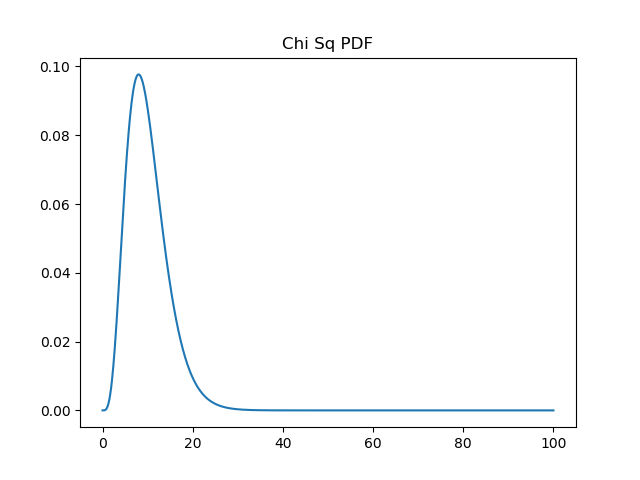

Integral value = Probability =  1.4102721829369158e-77


In [67]:

observed = freqs
model = line

# Using the formula above, then:
chi2 = 0
sigma = 0.02
for i in range(len(observed)):
    diff = observed[i] - model[i]
    chi2 += (diff/sigma)**2

# DoF = # datapoints - # parameters
df = len(currents) - 2
print('Reduced Chi squared = ', chi2)

 
x = np.linspace(0,100,1000)
chi2dist = stats.chi2.pdf(x, df)

from scipy.integrate import quad
def chi_integrand(x, df):
    return stats.chi2.pdf(x,df)

def chi_int(lower_bound, df):
    return quad(chi_integrand, lower_bound, np.inf, args = (df))[0]

value = chi_int(chi2, df)


plt.figure()
plt.title("Chi Sq PDF")
plt.plot(x, chi2dist)
plt.show()

# Intigrate from chi sq value to infinity to find the probability corresponding to the chisq 
print('Integral value = Probability = ', value)

From above, we see that the probability that the observed slope fits the model incredibly small. From these results, we conclude that the model is incorrect (or at least one specific parameter). In this case, we can assume that our partner's measurement of $\sigma = 0.02$ is incorrect, but the general behavior between the current and frequency is probably still a line.

# Part 3
assume best fit line in part 1 is a good fit to the data. <br /> Estimate uncertainty in y, slope, and the intercept
y = a + bx format <br />

# Using Bevington textbook equations: <br />
$\Delta' = N\sum x_i^2 - (\sum x_i)^2$ (6.13) <br />
$\sigma^2 = \frac{1}{N-2} \sum (y_i - a - bx_i)^2$ (6.15) <br />
$\sigma_a^2 = \frac{\sigma^2}{\Delta'} \sum x_i^2 , \sigma_b^2 = N \frac{\sigma^2}{\Delta'}$ (6.23)

Where $\sigma_a$ and $\sigma_b$ are uncertainties of those respective parameters ($ y = a + bx $ in this case)

In [68]:
yab = 0
sumofsquares = 0
sums = 0

for i in range(len(currents)):
    sumofsquares += currents[i]**2
    sums += currents[i]
    yab += (freqs[i] - intercept - slope*currents[i])**2
    
delta = len(currents)*sumofsquares - (sums)**2
sigma2 = yab/(len(currents) - 2)

sigmaA =  np.sqrt((sigma2/delta) * sumofsquares)
sigmaB = np.sqrt(len(currents)* (sigma2/delta))

print(sigmaA)
print(sigmaB)

0.06780373766388542
0.0522082341036085


In [69]:
print("Result:")
slopestr = "Slope = " + str(slope) + " +/- " + str(sigmaB)
interceptstr = "Intercept = " + str(intercept) + " +/- " + str(sigmaA)
print(slopestr)
print(interceptstr)

Result:
Slope = 3.003146853146853 +/- 0.0522082341036085
Intercept = 0.054871794871796276 +/- 0.06780373766388542


# Part 4: 
Assume uncertainty in each value grows with the function i.e. $\sigma(f) = 0.03 + 0.03*f$. <br />
Find slope and intercept of best-fit line using least squares w/ unequal weights.